In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Укажите полный путь до csv файла:')
filename = input()

#filename = 'C:/Users/Sasha/Desktop/Studing/ML_Labs/Lab1/student_scores.csv'
data = pd.read_csv(filename)

# Вывод первых строк
data.head()

Укажите полный путь до csv файла:


 C:/Users/Sasha/Desktop/Studing/ML_Labs/Lab1/student_scores.csv


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [194]:
# Статистическая информация об используемых данных (количество, min, max, среднее) по каждому из столбцов 
print("Статистика по данным:")
print(data.describe())

Статистика по данным:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [195]:
print('Укажите номера столбцов, интересующих вас (с 0-го индекса):')
x_col = int(input())
y_col = int(input())

#x_col = 0  # первый столбец — X
#y_col = 1  # второй столбец — Y

X = data.iloc[:, x_col].values
Y = data.iloc[:, y_col].values

print(f"Выбраны столбцы: X = '{data.columns[x_col]}', Y = '{data.columns[y_col]}'")

Укажите номера столбцов, интересующих вас (с 0-го индекса):


 0
 1


Выбраны столбцы: X = 'Hours', Y = 'Scores'


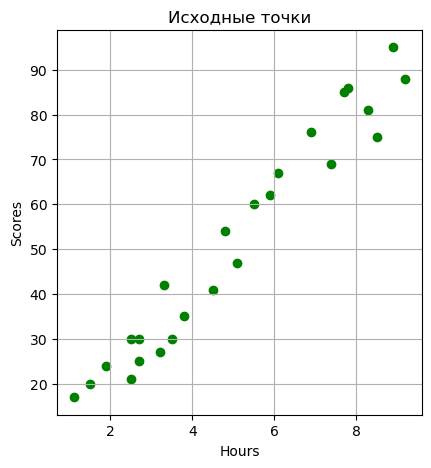

In [196]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.scatter(X, Y, color='green')
plt.title('Исходные точки')
plt.xlabel(data.columns[x_col])
plt.ylabel(data.columns[y_col])
plt.grid(True)

Коэф. лин. регрессии: наклон (w) = 9.7758, смещение (b) = 2.4837


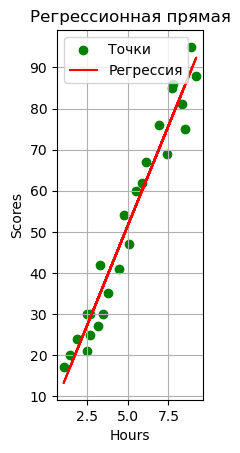

In [197]:
#коэффициенты линии регрессии
x_mean = np.mean(X)
y_mean = np.mean(Y)
# w - наклон, b - смещение 
w = np.sum((X - x_mean)*(Y - y_mean)) / np.sum((X - x_mean)**2)
b = y_mean - w * x_mean

print(f"Коэф. лин. регрессии: наклон (w) = {w:.4f}, смещение (b) = {b:.4f}")

Y_pred = w * X + b


plt.subplot(1, 3, 2)
plt.scatter(X, Y, color='green', label='Точки')
plt.plot(X, Y_pred, color='red', label='Регрессия')
plt.title('Регрессионная прямая')
plt.xlabel(data.columns[x_col])
plt.ylabel(data.columns[y_col])
plt.legend()
plt.grid(True)

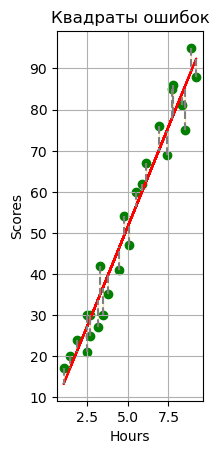

In [198]:
plt.subplot(1, 3, 3)
plt.scatter(X, Y, color='green')
plt.plot(X, Y_pred, color='red')

# квадраты ошибок
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_pred[i]], color='gray', linestyle='--')
    plt.fill_between([X[i], X[i]], [Y[i]], [Y_pred[i]], color='orange', alpha=0.3)

plt.title('Квадраты ошибок')
plt.xlabel(data.columns[x_col])
plt.ylabel(data.columns[y_col])
plt.grid(True)

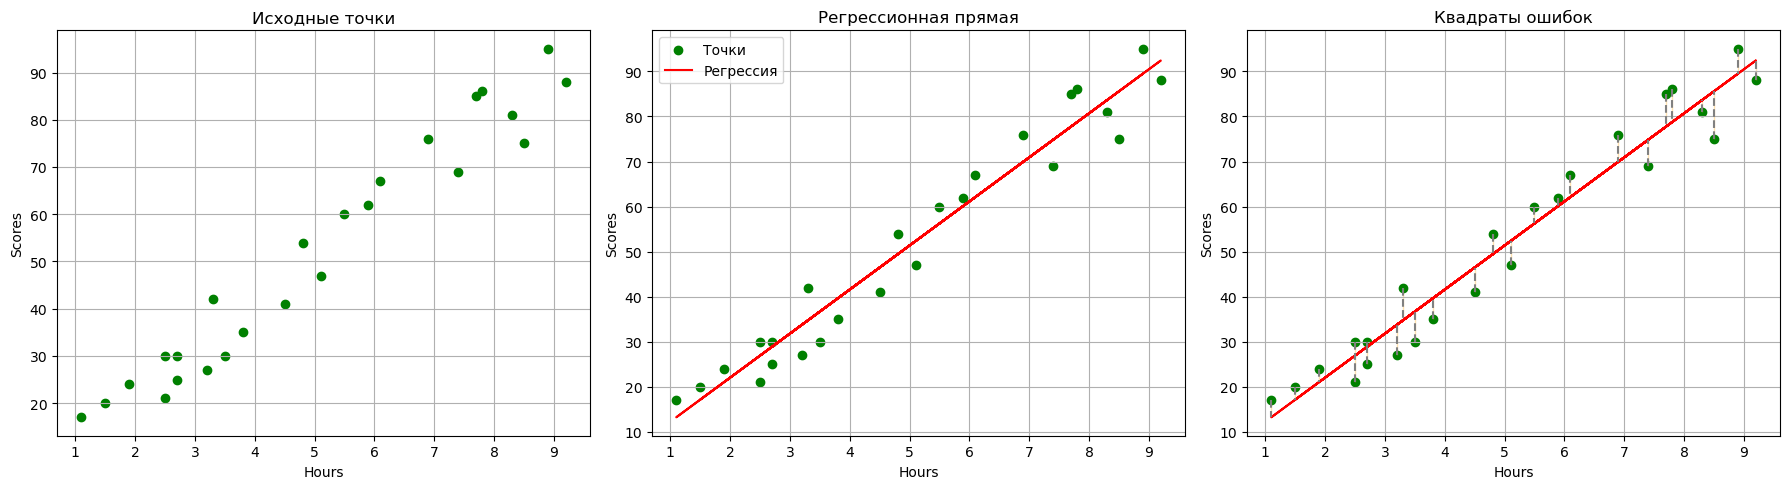

In [199]:
# Отрисовываем все три графика в конце 
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Исходные точки
axs[0].scatter(X, Y, color='green')
axs[0].set_title('Исходные точки')
axs[0].set_xlabel(data.columns[x_col])
axs[0].set_ylabel(data.columns[y_col])
axs[0].grid(True)

# Регрессионная прямая
axs[1].scatter(X, Y, color='green', label='Точки')
axs[1].plot(X, Y_pred, color='red', label='Регрессия')
axs[1].set_title('Регрессионная прямая')
axs[1].set_xlabel(data.columns[x_col])
axs[1].set_ylabel(data.columns[y_col])
axs[1].legend()
axs[1].grid(True)

# Квадраты ошибок
axs[2].scatter(X, Y, color='green')
axs[2].plot(X, Y_pred, color='red')
for i in range(len(X)):
    axs[2].plot([X[i], X[i]], [Y[i], Y_pred[i]], color='gray', linestyle='--')
    axs[2].fill_between([X[i], X[i]], [Y[i]], [Y_pred[i]], color='orange', alpha=0.3)
axs[2].set_title('Квадраты ошибок')
axs[2].set_xlabel(data.columns[x_col])
axs[2].set_ylabel(data.columns[y_col])
axs[2].grid(True)


plt.tight_layout()
plt.show()
